# Plot grafa podataka iz .csv filea

Demo kako uz pomoć pythona i _matplotlib_ biblioteke za prikaz grafova

Prvo uvezemo potrbne bibliteke

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import genfromtxt, arange, sin, pi
from matplotlib import style
from matplotlib import dates as mpl_dates
import numpy as np

Unese se ime datoteke s podacima i mapiraju se polja sukladno zapisanome.

U ovom primjeru podaci su razdvojeni s znakom ',' ali česti je slučaja kada su podaci odvojeni nekim drugim znakom te se to treba posebno naznačiti kako bi program znao granice između polja.

In [11]:
filename='GPSLOG10.CSV'
#plt.style.use('ggplot')
data=pd.read_csv(filename, header=None, delimiter=',', names=['Sentence','Time','Validity','Latitue','NS','Longitude','EW','Speed',
                                               'Direction','Date','NA1','NA2','Checksum','Temperature'])

Sada smo spremni za prikazati prikupljene podatke.

Prvo možemo prikazati jednostavan s/t graf - brzinu u vremenu. Kako je brzina zapisana u čvorovima, a mi je želimo prikazati u km/h potrebno izvršiti konverziju. 1 nautična milja odgovara 1.852 km.

Svaki graf treba imati označene osi.S komandom plt.xlabel i ylabel označili smo osi grafa i analogno tome imenovan je i graf kako bi čitatelj znao što graf predstavlja.
Naravno, pojedinačni grafovi se mogu posebno spremiti u visokoj rezoluciji i željenom formatu za kasniju upotrebu.

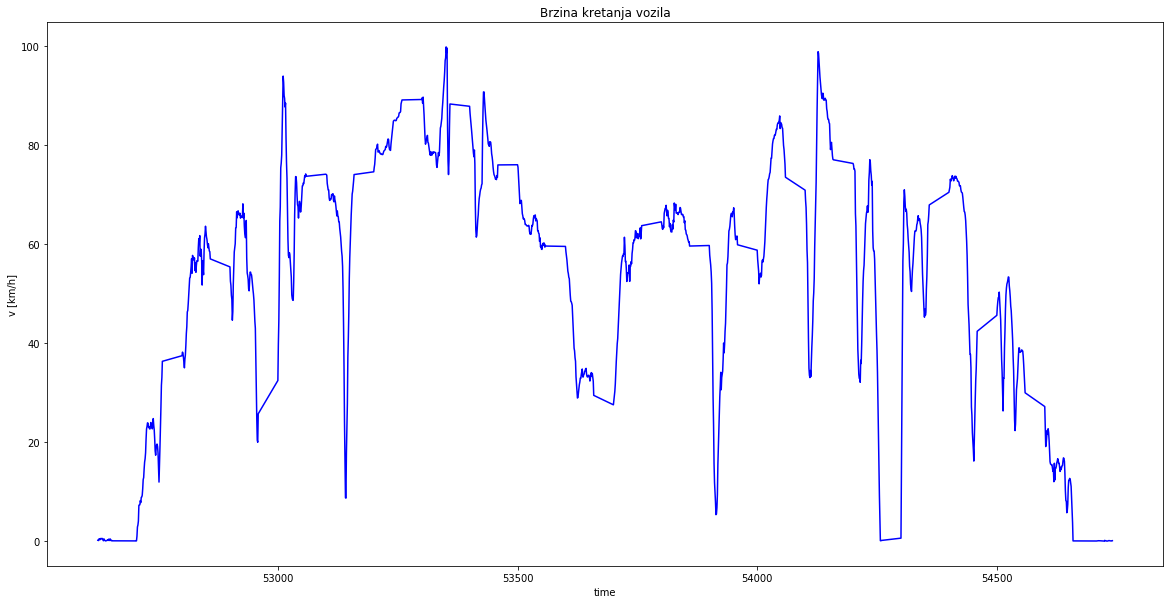

In [12]:
#otvori graf u novom prozoru
#%matplotlib
plt.plot(data['Time'],data['Speed']*1.852, 'b-')

plt.xlabel ('time')
plt.ylabel ('v [km/h]')
plt.title('Brzina kretanja vozila')
plt.savefig('GrafKretanjaBrzineVozila.png',format='png', bbox_inches='tight', dpi=600)

Dodatno se mogu izračunati i pogledati razni podaci koje nas zanimaju.

Ako npr. želimo znati koja je bila maksimalna brzina kojom se vozilo kretalo to se može vidjeti na sljedeći naćin:

In [13]:
print('Maksimalna brzina = ',np.max(data['Speed']*1.852) , 'km/h')

Maksimalna brzina =  99.73020000000001 km/h


Ako nas zanimaju podaci o temperaturi moguće je čak koristiti i ugrađene statističke funkcije za izračunati željene podatke

Minimalna temperatura:  25.73 °C
Maximalna temperatura:  27.99 °C
Razlika temperature:  2.259999999999998 °C
Razlika temperature:  2.26 °C
Prosječna temperatura:  26.64 °C ±  0.57 °C


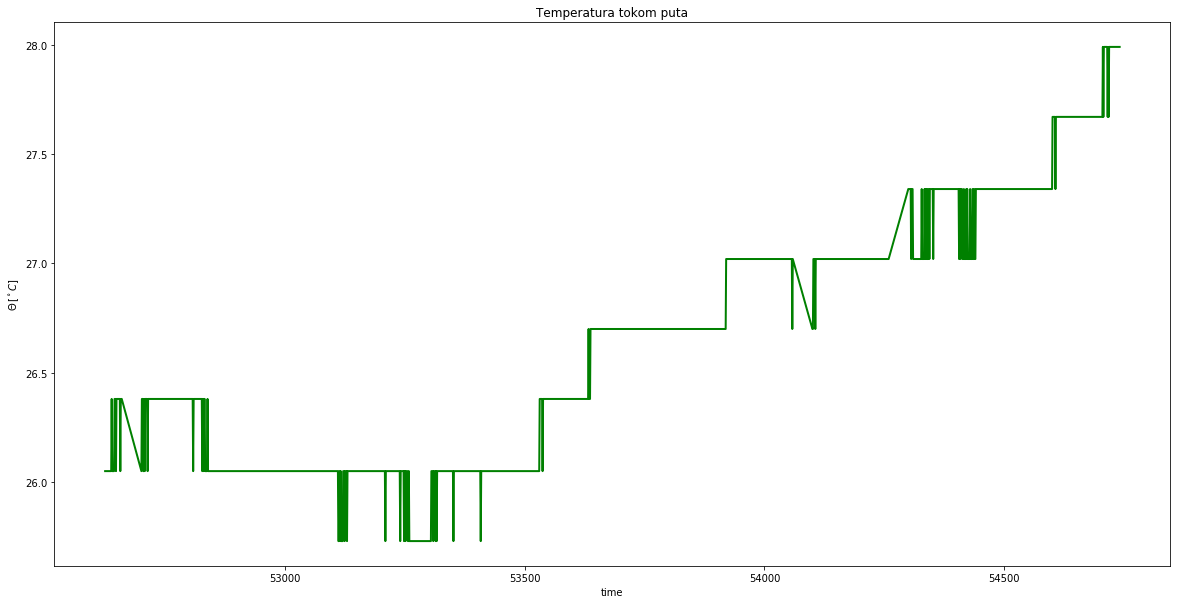

In [15]:
# prikazi graf inline
%matplotlib inline 
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(data['Time'],data['Temperature'], 'g', linewidth=2)

plt.xlabel ('time')
plt.ylabel ('$\Theta \, [^\circ C]$')
plt.title('Temperatura tokom puta')

print ('Minimalna temperatura: ',np.min(data['Temperature']), '°C')
print ('Maximalna temperatura: ',np.max(data['Temperature']), '°C')
print ('Razlika temperature: ',np.max(data['Temperature']) - np.min(data['Temperature']), '°C')
print ('Razlika temperature: ','{:.2f}'.format(np.ptp(data['Temperature'])), '°C')
print ('Prosječna temperatura: ', '{:.2f}'.format(np.mean(data['Temperature'])), '°C ± ',
       '{:.2f}'.format(np.std(data['Temperature'])), '°C')